In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [31]:
zip_ref = zipfile.ZipFile("/content/gdrive/My Drive/3546_Deep_Learning/AnimeFaceDataset.zip", 'r')
zip_ref.extractall("/tmp")
zip_ref.close()

In [ ]:
!unzip -u "/content/gdrive/My Drive/3546_Deep_Learning/ZippedAnimeFaceDataset.zip" -d "/content/gdrive/My Drive/3546_Deep_Learning/AnimeFaceDataset"

Streaming output truncated to the last 5000 lines.
  inflating: /content/gdrive/My Drive/3546_Deep_Learning/AnimeFaceDataset/images/5676_2003.jpg  
  inflating: /content/gdrive/My Drive/3546_Deep_Learning/AnimeFaceDataset/images/56770_2017.jpg  
  inflating: /content/gdrive/My Drive/3546_Deep_Learning/AnimeFaceDataset/images/56771_2017.jpg  
  inflating: /content/gdrive/My Drive/3546_Deep_Learning/AnimeFaceDataset/images/56772_2017.jpg  
  inflating: /content/gdrive/My Drive/3546_Deep_Learning/AnimeFaceDataset/images/56773_2017.jpg  
  inflating: /content/gdrive/My Drive/3546_Deep_Learning/AnimeFaceDataset/images/56774_2017.jpg  
  inflating: /content/gdrive/My Drive/3546_Deep_Learning/AnimeFaceDataset/images/56775_2017.jpg  
  inflating: /content/gdrive/My Drive/3546_Deep_Learning/AnimeFaceDataset/images/56776_2017.jpg  
  inflating: /content/gdrive/My Drive/3546_Deep_Learning/AnimeFaceDataset/images/56777_2017.jpg  
  inflating: /content/gdrive/My Drive/3546_Deep_Learning/AnimeFaceDa

In [5]:
%matplotlib inline
import argparse
import os
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Set random seed for reproducibility
seed = 42
# seed = random.randint(1, 10000) # use if you want new results
print("Random Seed: ", seed)
random.seed(seed)
torch.manual_seed(seed)

Random Seed:  42


In [14]:
# Root directory for dataset
dataroot = "/content/gdrive/My Drive/3546_Deep_Learning/AnimeFaceDataset"

# Number of workers for dataloader
workers = 2

# Batch size during training
batch_size = 128

# Spatial size of training images. All images will be resized to this
#   size using a transformer.
image_size = 64

# normalize the pixel values with a mean & standard deviation of 0.5 for each channel, to ensure that pixel values are in the range (-1, 1)
stats = (0.5, 0.5, 0.5), (0.5, 0.5, 0.5)

# Number of channels in the training images. For color images this is 3
nc = 3

# Size of z latent vector (i.e. size of generator input)
nz = 100

# Size of feature maps in generator
ngf = 64

# Size of feature maps in discriminator
ndf = 64

# Number of training epochs
num_epochs = 50 # Original is 5 on a dataset of 1 million

# Learning rate for optimizers
lr = 0.0002

# Beta1 hyperparam for Adam optimizers
beta1 = 0.5

# Number of GPUs available. Use 0 for CPU mode.
ngpu = 1

In [16]:
# Create the dataset
dataset = ImageFolder(root=dataroot,
                      transform=transforms.Compose([
                               transforms.Resize(image_size),
                               transforms.CenterCrop(image_size),
                               transforms.ToTensor(),
                               transforms.Normalize(*stats),
                           ]))
# Create the dataloader
dataloader = DataLoader(dataset, batch_size=batch_size,
                                        shuffle=True, num_workers=workers)

# # Decide which device we want to run on
# device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")


In [17]:
from torchvision.utils import make_grid

def denorm(img_tensors):
    return img_tensors * stats[1][0] + stats[0][0]

def show_images(images, nmax=64):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid(denorm(images.detach()[:nmax]), nrow=8).permute(1, 2, 0))

def show_batch(dl, nmax=64):
    for images, _ in dl:
        show_images(images, nmax)
        break

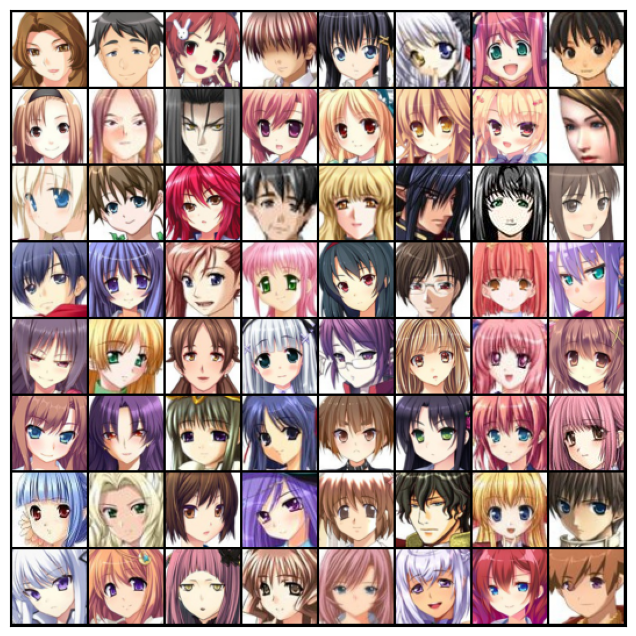

In [18]:
show_batch(dataloader)